# Curve Fitting

GraphingLib simplifies curve fitting down to a single line. First, import GraphingLib and numpy:

In [11]:
import graphinglib as gl
import numpy as np

Many common curve fit types have their dedicated objects which makes their use extremely easy. Guesses for the parameters can be provided for all fits, but they are not always necessary. Here are some examples:

**Polynomial**

[-1.17191862  1.01950371  1.00313943  0.05189834]


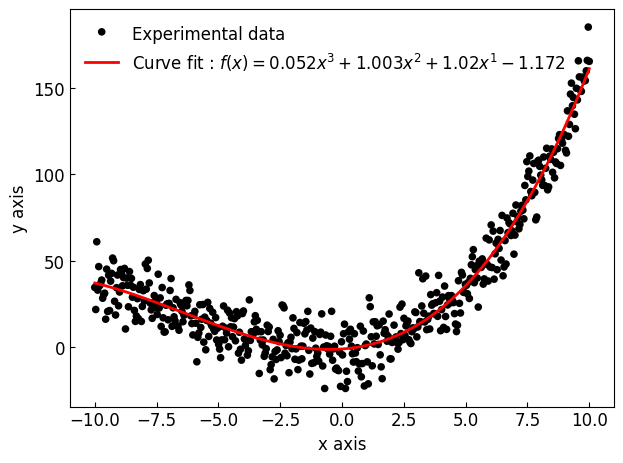

In [12]:
# Creating data
x_data = np.linspace(-10, 10, 500)
noise = np.random.normal(0, 10, len(x_data))
y_data = 0.05 * x_data ** 3 + x_data ** 2 + x_data + noise

# Create the Scatter object
scatter_data = gl.Scatter(x_data, y_data, label="Experimental data")

# Create the curve fit
poly_fit = gl.FitFromPolynomial(scatter_data, degree=3, label="Curve fit", line_width=2)
print(poly_fit.coeffs)

# Creat the Figure object
figure = gl.Figure()
figure.add_element(scatter_data, poly_fit)
figure.display()

**Exponential**

[1.774053  0.9083776 1.7152212]


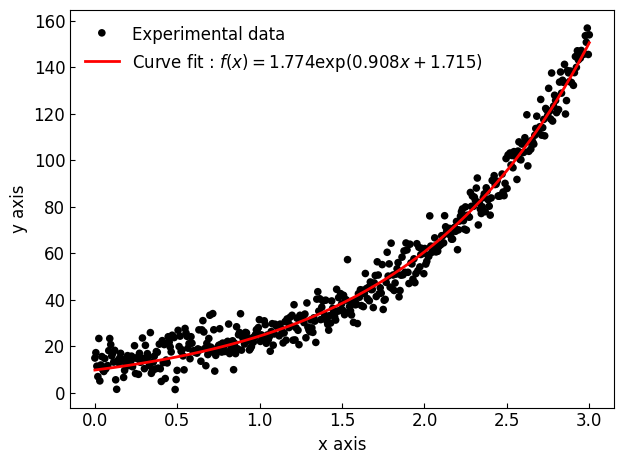

In [13]:
# Creating data
x_data = np.linspace(0, 3, 500)
noise = np.random.normal(0, 5, len(x_data))
y_data = 5 + np.e**(x_data + 2) + noise

# Create the Scatter object
scatter_data = gl.Scatter(x_data, y_data, label="Experimental data")

# Create the curve fit
expo_fit = gl.FitFromExponential(scatter_data, label="Curve fit", line_width=2)
print(expo_fit.parameters)

# Creat the Figure object
figure = gl.Figure()
figure.add_element(scatter_data, expo_fit)
figure.display()

**Sinusoidal**

0.49928355710243777 2.0029067538404464 3.1309100149800297 0.009265616023083222


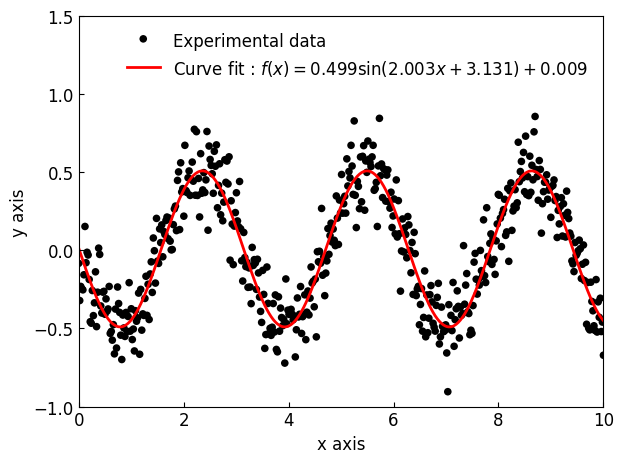

In [14]:
# Creating data
x_data = np.linspace(0, 10, 500)
noise = np.random.normal(0, 0.15, len(x_data))
y_data = 0.5*np.sin(2*x_data + np.pi) + noise

# Create the Scatter object
scatter_data = gl.Scatter(x_data, y_data, label="Experimental data")

# Create the curve fit
sine_fit = gl.FitFromSine(scatter_data, label="Curve fit", line_width=2, guesses=[1, 2, 3, 4])
print(sine_fit.amplitude, sine_fit.frequency_rad, sine_fit.phase, sine_fit.vertical_shift)

# Creat the Figure object
figure = gl.Figure(x_lim=[0, 10], y_lim=[-1, 1.5])
figure.add_element(scatter_data, sine_fit)
figure.display()

**Logarithmic**

[3.92970975 0.75128273 0.26447479]


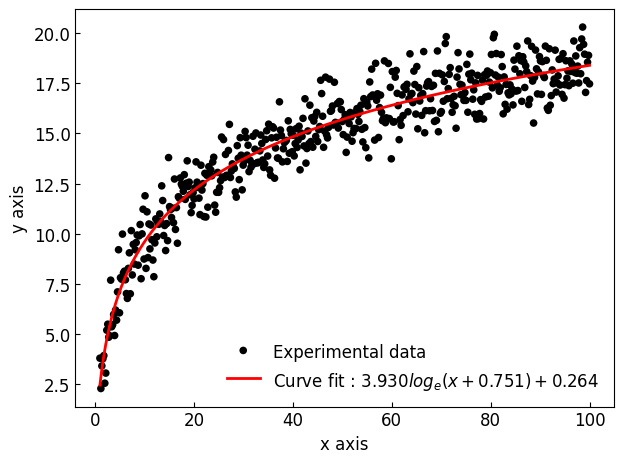

In [15]:
# Creating data
x_data = np.linspace(1, 100, 500)
noise = np.random.normal(0, 1, len(x_data))
y_data = 4* np.log(x_data + 1) + noise

# Create the Scatter object
scatter_data = gl.Scatter(x_data, y_data, label="Experimental data")

# Create the curve fit
log_fit = gl.FitFromLog(scatter_data, label="Curve fit", line_width=2)
print(log_fit.parameters)

# Creat the Figure object
figure = gl.Figure()
figure.add_element(scatter_data, log_fit)
figure.display()


**Square Root**

[4.03269318 3.36957414 0.14665636]


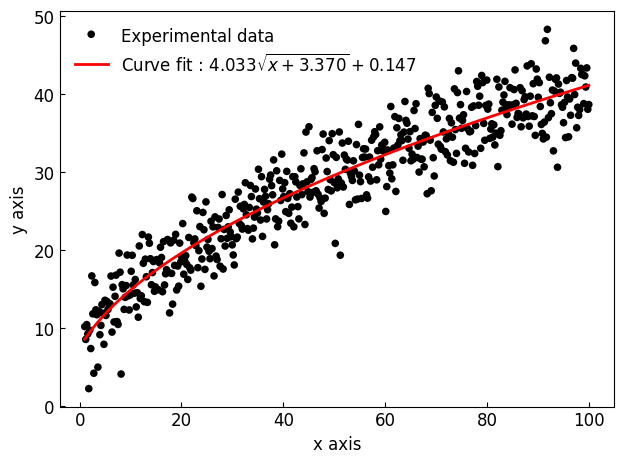

In [16]:
# Creating data
x_data = np.linspace(1, 100, 500)
noise = np.random.normal(0, 3, len(x_data))
y_data = 4 * np.sqrt(x_data + 5) + noise

# Create the Scatter object
scatter_data = gl.Scatter(x_data, y_data, label="Experimental data")

# Create the curve fit
root_fit = gl.FitFromSquareRoot(scatter_data, label="Curve fit", line_width=2)
print(root_fit.parameters)

# Creat the Figure object
figure = gl.Figure()
figure.add_element(scatter_data, root_fit)
figure.display()

**Gaussian**

3.987994498000549 3.0146949839993984 2.014825054387117


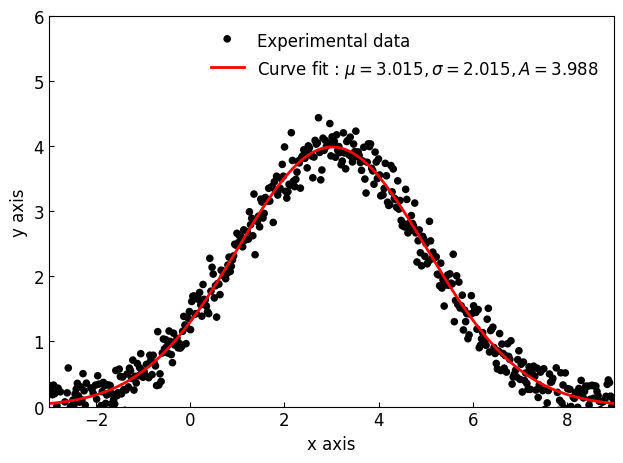

In [17]:
# Creating data
x_data = np.linspace(-3, 9, 500)
noise = np.random.normal(0, 0.2, len(x_data))
y_data = 4 * np.e**(-(1/2)*((x_data-3)/2)**2) + noise

# Create the Scatter object
scatter_data = gl.Scatter(x_data, y_data, label="Experimental data")

# Create the curve fit
gaussian_fit = gl.FitFromGaussian(scatter_data, label="Curve fit", line_width=2)
print(gaussian_fit.amplitude, gaussian_fit.mean, gaussian_fit.standard_deviation)

# Creat the Figure object
figure = gl.Figure(x_lim=[-3, 9], y_lim=[0, 6])
figure.add_element(scatter_data, gaussian_fit)
figure.display()

## Parameters, Uncertainty, and Covariance Matrix

At any point after having created a curve fit object, one can access the parameters of the fit as shown in the examples above. The covariance matrix of the fit is also available using the following command:

In [18]:
print(poly_fit.cov_matrix)

[[ 4.64889105e-01 -5.22077355e-17 -7.71726217e-03  6.09541234e-19]
 [-5.22077355e-17  3.85869283e-02  2.26959873e-18 -5.38066180e-04]
 [-7.71726217e-03  2.26959873e-18  2.30593642e-04 -2.90096631e-20]
 [ 6.09541234e-19 -5.38066180e-04 -2.90096631e-20  8.93201783e-06]]


The standard deviations of all parameters are also available using:

In [19]:
# For most fits
print(poly_fit.standard_deviation)

# In the case of the gaussian fit
print(gaussian_fit.standard_deviation_of_fit_params)

[0.68182777 0.19643556 0.01518531 0.00298865]
[0.02024002 0.01180365 0.01182643]


## Plotting Residuals
A histogram of the residuals of the fit is made by passing the fit to the Histogram object:

Standard deviation: 10.123316519848084
Mean: 1.7337242752546444e-15


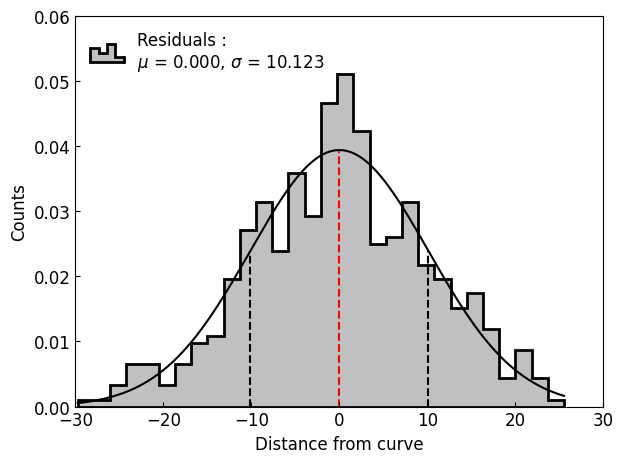

In [20]:
# Automatically calculate the residuals and create the Histogram object
residuals = gl.Histogram.plot_residuals_from_fit(poly_fit, number_of_bins=30, label="Residuals", show_pdf="normal")

# Access the histogram parameters
print(f"Standard deviation: {residuals.standard_deviation}")
print(f"Mean: {residuals.mean}")

# Create and display the figure
figure = gl.Figure(x_label="Distance from curve", y_label="Counts", x_lim=[-30, 30], y_lim=[0, 0.06])
figure.add_element(residuals)
figure.display()
